In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt

import ai2thor
import ai2thor_colab
from ai2thor_colab import plot_frames, side_by_side
from ai2thor.controller import Controller

from IPython.display import clear_output

In [2]:
from ai2thor.platform import CloudRendering
controller = Controller(platform=CloudRendering)

## Workspace

In [3]:
def show_object_detected(controller):

    data = controller.last_event.metadata['objects']

    df_data = pd.DataFrame(data)

    df_object = df_data[(df_data['name'] == 'Toaster_f745e839') | (df_data['name'] == 'CoffeeMachine_61ed6a3e') | 
                        (df_data['name'] == 'Microwave_e71f2758') | (df_data['name'] == 'Fridge_22a96a15') | 
                        (df_data['name'] == 'LightSwitch_43d10eaa')]
    
    print('Object detected:')
    print(dict(df_object['name'][df_object['visible'] == True]))

In [4]:
floor_index = random.randint(0, 30)
floor_index = 15

controller = Controller(
    agentMode = "default", # arm
    visibilityDistance = 0.75,
    scene = f"FloorPlan{floor_index}",

    # step sizes
    gridSize = 0.25,
    snapToGrid = True,
    rotateStepDegrees = 90,

    # image modalities
    renderInstanceSegmentation = False,
    renderDepthImage = False,
    renderSemanticSegmentation = False,
    renderNormalsImage = False,
    
    # camera properties
    width = 1200,
    height = 800,
    fieldOfView = 120
)

In [5]:
w = "MoveAhead"
a = "MoveLeft"
s = "MoveBack"
d = "MoveRight"

l = "RotateLeft"
r = "RotateRight"

In [6]:
data = controller.last_event.metadata['objects']
df_data = pd.DataFrame(data)

Agent position:
{'x': -1.5, 'y': 0.914953351020813, 'z': 2.25}
Object detected:
{}


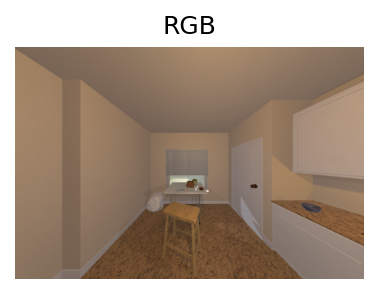

In [7]:
command = s

event = controller.step(command)
agent_position = event.metadata["agent"]["position"]

print("Agent position:")
print(agent_position)
show_object_detected(controller)

plot_frames(controller.last_event)

---

In [8]:
data = controller.last_event.metadata['objects']
data

[{'name': 'Apple_8a347234',
  'position': {'x': -3.2419352531433105,
   'y': 0.9669005870819092,
   'z': 2.9423680305480957},
  'rotation': {'x': 88.89305877685547,
   'y': 180.83445739746094,
   'z': 180.8189239501953},
  'visible': False,
  'isInteractable': False,
  'receptacle': False,
  'toggleable': False,
  'isToggled': False,
  'breakable': False,
  'isBroken': False,
  'canFillWithLiquid': False,
  'isFilledWithLiquid': False,
  'fillLiquid': None,
  'dirtyable': False,
  'isDirty': False,
  'canBeUsedUp': False,
  'isUsedUp': False,
  'cookable': False,
  'isCooked': False,
  'temperature': 'RoomTemp',
  'isHeatSource': False,
  'isColdSource': False,
  'sliceable': True,
  'isSliced': False,
  'openable': False,
  'isOpen': False,
  'openness': 0.0,
  'pickupable': True,
  'isPickedUp': False,
  'moveable': False,
  'mass': 0.20000000298023224,
  'salientMaterials': ['Food'],
  'receptacleObjectIds': None,
  'distance': 1.8752094507217407,
  'objectType': 'Apple',
  'objectI

In [ ]:
def encode_feedback(event, controller, target_name):
    
    agent_position = event.metadata["agent"]["position"]
    data = controller.last_event.metadata['objects']
    
    index_location = next((index for index, item in enumerate(data) if item['name'] == target_name), None)
    is_found = data[index_location]['visible']
    
    if is_found:
        reward = +10
    else:
        reward = -0.05
    
    return None, random.random(), is_found, None

---